In [1]:
import pandas as pd            # Veri okuma, işleme, analiz
import numpy as np             # Sayısal işlemler, diziler için
import matplotlib.pyplot as plt  # Grafik çizimi (statik)
import seaborn as sns          # Güzel, kolay grafikler
import plotly.express as px    # İnteraktif grafikler

# Opsiyonel ama yararlı: Uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/kaggle/input/lidata/survey_results_public.csv")
df = data.copy()

In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
df.tail()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65436,65437,I code primarily as a hobby,18-24 years old,"Student, full-time",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [6]:
df.shape

(65437, 114)

In [7]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [8]:
lang_series = df['LanguageHaveWorkedWith'].dropna().str.split(';') # sütundaki boş veirleri çıkar ve dilleri ayır
all_lang = [lang.strip() for sublist in lang_series for lang in sublist]
lang_counts = pd.Series(all_lang).value_counts()
top_langs = lang_counts.head(15)

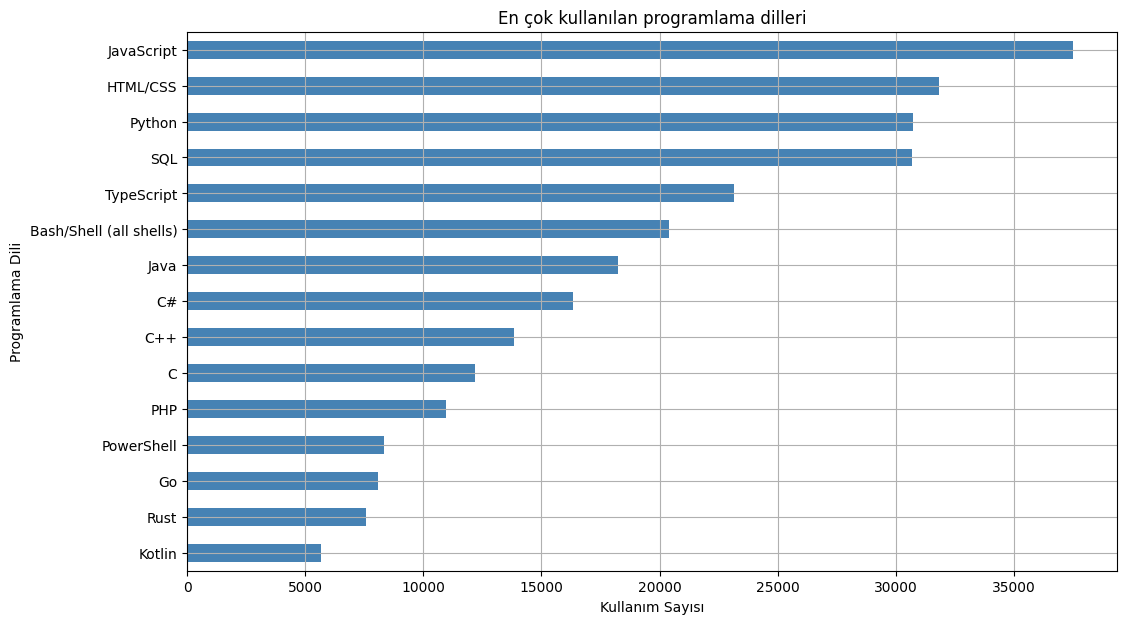

In [9]:
plt.figure(figsize=(12,7))
top_langs.sort_values().plot(kind='barh', color='steelblue')
plt.title('En çok kullanılan programlama dilleri')
plt.xlabel('Kullanım Sayısı')
plt.ylabel('Programlama Dili')
plt.grid(True)
plt.show()

In [10]:
want_learn = df['LanguageWantToWorkWith'].dropna().str.split(';')
all_want = [lang.strip() for sublist in want_learn for lang in sublist]
want_counts = pd.Series(all_want).value_counts()
top_wants = want_counts.head(10)

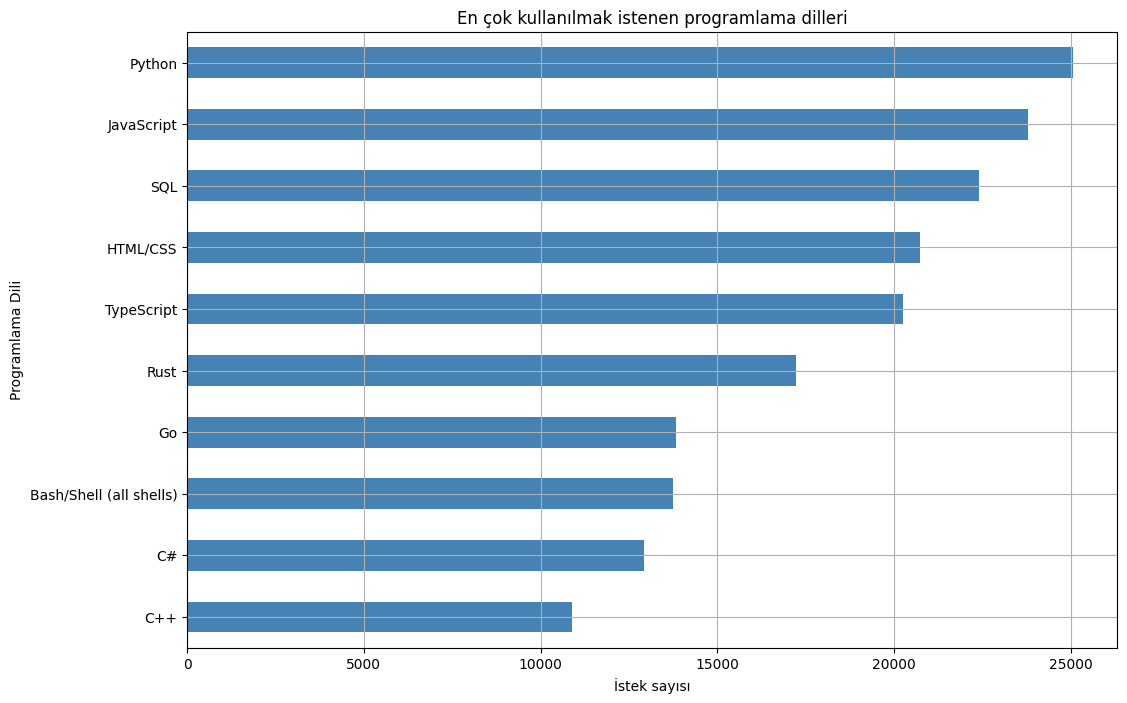

In [11]:
plt.figure(figsize=(12,8))
top_wants.sort_values().plot(kind='barh', color='steelblue')
plt.title('En çok kullanılmak istenen programlama dilleri')
plt.xlabel('İstek sayısı')
plt.ylabel('Programlama Dili')
plt.grid(True)
plt.show()

In [12]:
db_list = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
all_use = [lang.strip() for sublist in db_list for lang in sublist]
use_counts = pd.Series(all_use).value_counts()
top_use = use_counts.head(10)

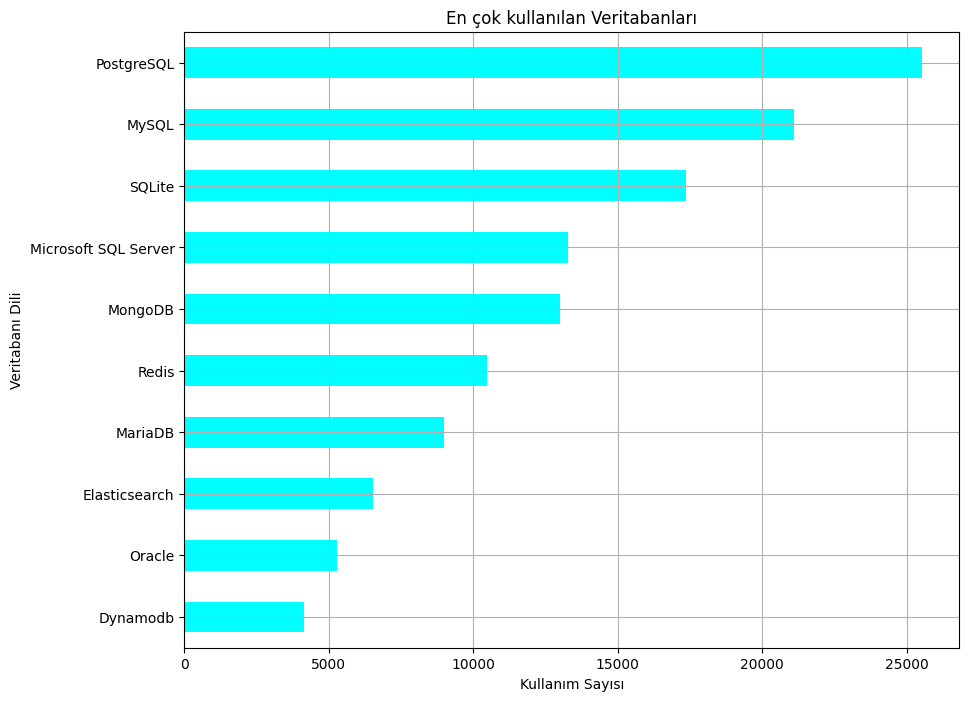

In [13]:
plt.figure(figsize=(10,8))
top_use.sort_values().plot(kind='barh',color='cyan')
plt.title('En çok kullanılan Veritabanları')
plt.xlabel('Kullanım Sayısı')
plt.ylabel('Veritabanı Dili')
plt.grid(True)
plt.show()

In [14]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

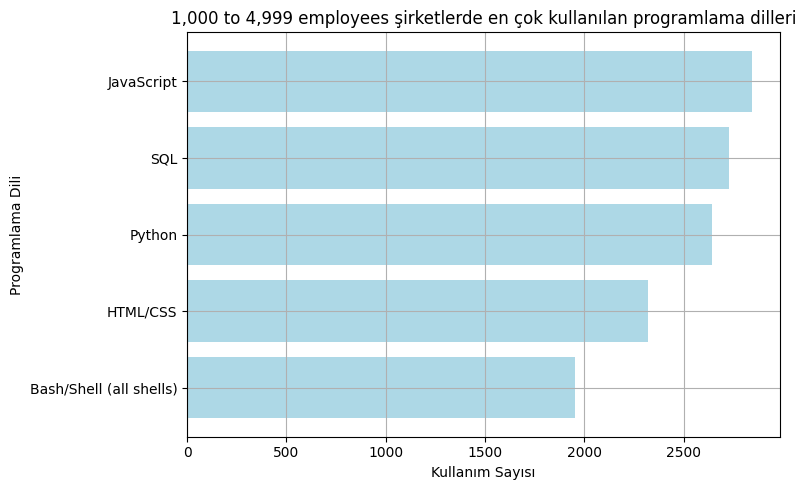

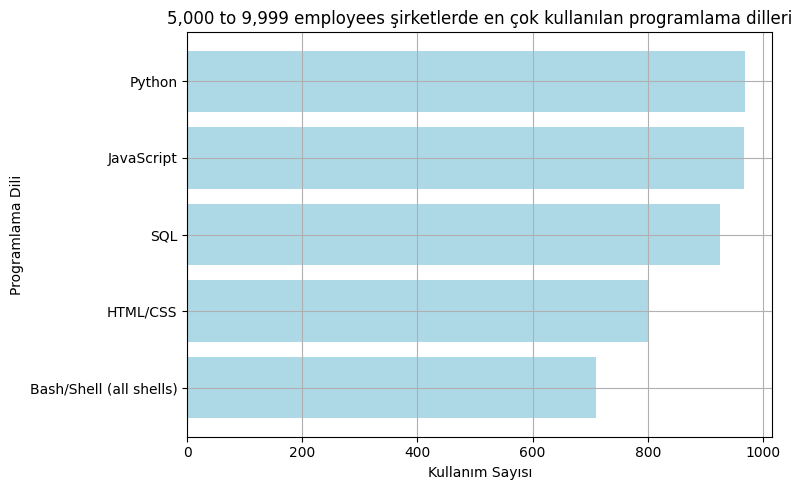

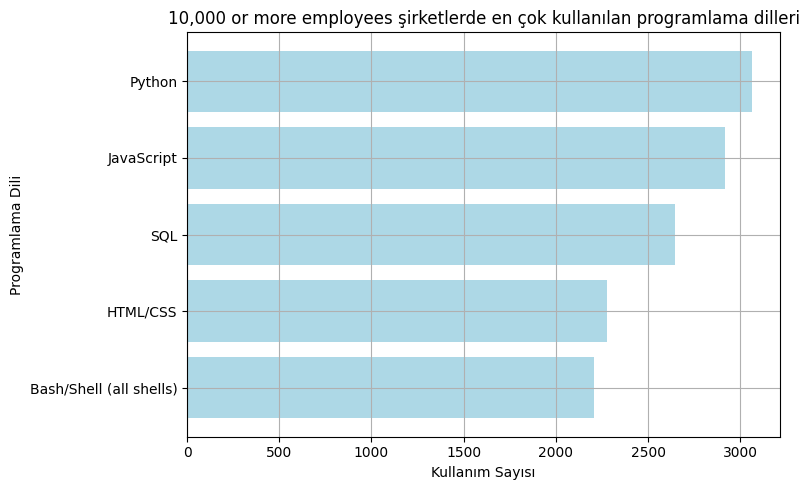

In [15]:
lang_by_company = df.dropna(subset=['LanguageHaveWorkedWith', 'OrgSize'])
lang_by_company['LanguageHaveWorkedWith'] = lang_by_company['LanguageHaveWorkedWith'].str.split(';')
exploded = lang_by_company.explode('LanguageHaveWorkedWith')
exploded['LanguageHaveWorkedWith'] = exploded['LanguageHaveWorkedWith'].str.strip()

grouped = exploded.groupby(['OrgSize', 'LanguageHaveWorkedWith']).size().reset_index(name='count')

# Örnek: büyük 3 şirket grubunda en çok kullanılan diller
top_sizes = ['1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']

for size in top_sizes:
    subset = grouped[grouped['OrgSize'] == size].sort_values('count', ascending=False).head(5)
    plt.figure(figsize=(8, 5))
    plt.barh(subset['LanguageHaveWorkedWith'], subset['count'], color='lightblue')
    plt.title(f'{size} şirketlerde en çok kullanılan programlama dilleri')
    plt.xlabel('Kullanım Sayısı')
    plt.ylabel('Programlama Dili')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

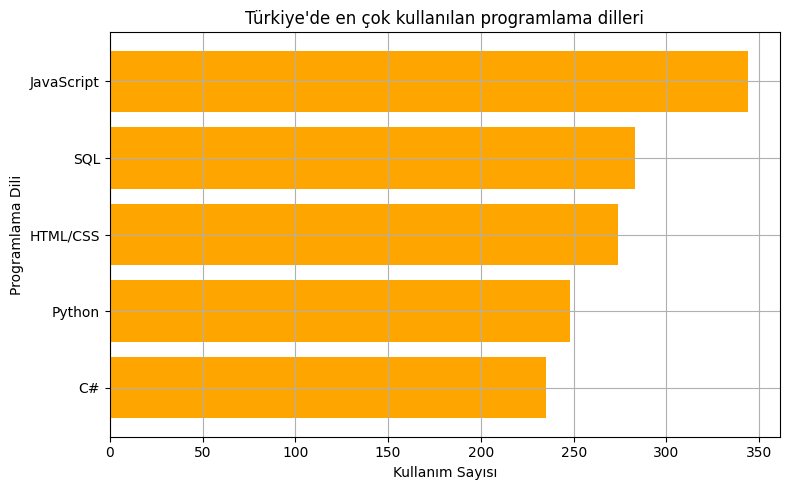

In [16]:
lang_by_country = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])
lang_by_country['LanguageHaveWorkedWith'] = lang_by_country['LanguageHaveWorkedWith'].str.split(';')
exploded = lang_by_country.explode('LanguageHaveWorkedWith')
exploded['LanguageHaveWorkedWith'] = exploded['LanguageHaveWorkedWith'].str.strip()

grouped = exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='count')

# Örnek: Türkiye'de en çok kullanılan 5 programlama dili
turkey_langs = grouped[grouped['Country'] == 'Turkey'].sort_values('count', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.barh(turkey_langs['LanguageHaveWorkedWith'], turkey_langs['count'], color='orange')
plt.title('Türkiye\'de en çok kullanılan programlama dilleri')
plt.xlabel('Kullanım Sayısı')
plt.ylabel('Programlama Dili')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

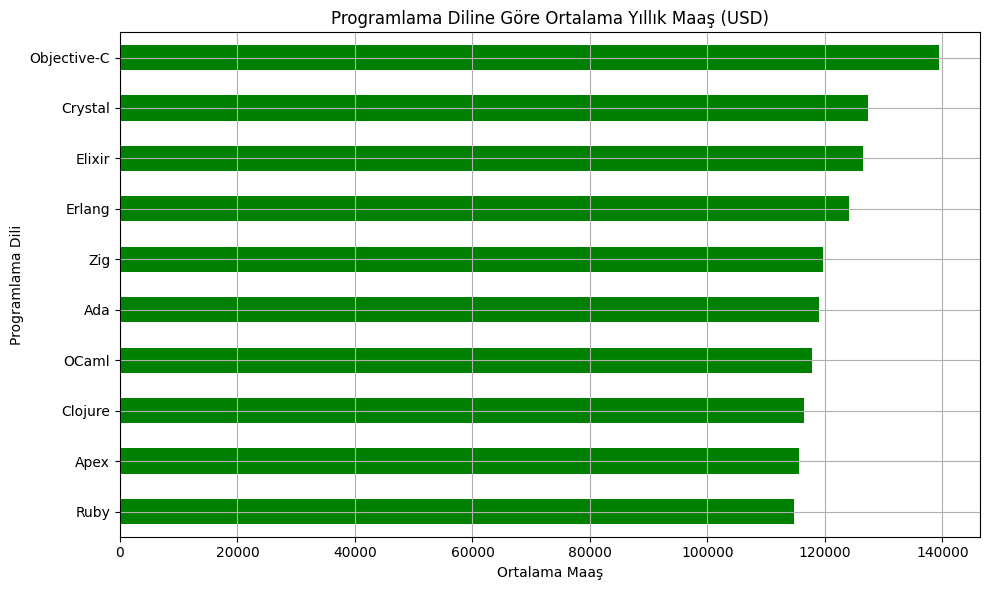

In [17]:
salary_df = df.dropna(subset=['LanguageHaveWorkedWith', 'ConvertedCompYearly'])
salary_df['LanguageHaveWorkedWith'] = salary_df['LanguageHaveWorkedWith'].str.split(';')
exploded = salary_df.explode('LanguageHaveWorkedWith')
exploded['LanguageHaveWorkedWith'] = exploded['LanguageHaveWorkedWith'].str.strip()

avg_salary = exploded.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_salary.sort_values().plot(kind='barh', color='green')
plt.title('Programlama Diline Göre Ortalama Yıllık Maaş (USD)')
plt.xlabel('Ortalama Maaş')
plt.ylabel('Programlama Dili')
plt.grid(True)
plt.tight_layout()
plt.show()

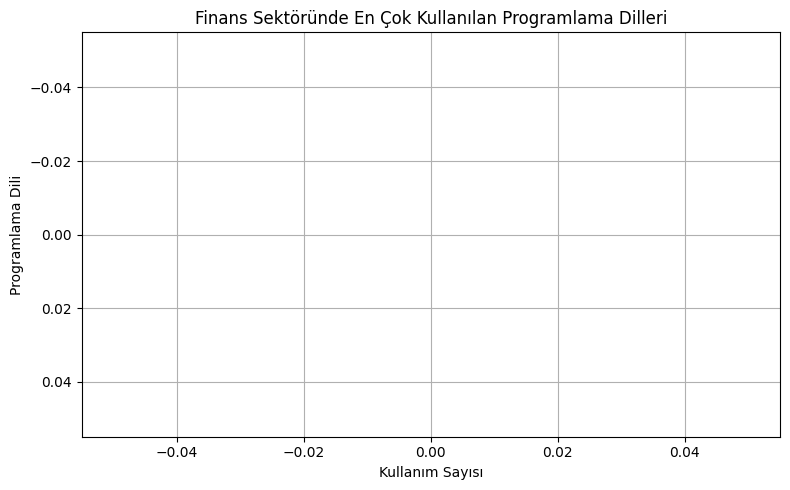

In [18]:
lang_by_industry = df.dropna(subset=['LanguageHaveWorkedWith', 'Industry'])
lang_by_industry['LanguageHaveWorkedWith'] = lang_by_industry['LanguageHaveWorkedWith'].str.split(';')
exploded = lang_by_industry.explode('LanguageHaveWorkedWith')
exploded['LanguageHaveWorkedWith'] = exploded['LanguageHaveWorkedWith'].str.strip()

grouped = exploded.groupby(['Industry', 'LanguageHaveWorkedWith']).size().reset_index(name='count')

# Örnek: Finans sektöründe en çok kullanılan 5 programlama dili
finance_langs = grouped[grouped['Industry'].str.contains('Finance', case=False, na=False)]
finance_top = finance_langs.sort_values('count', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.barh(finance_top['LanguageHaveWorkedWith'], finance_top['count'], color='purple')
plt.title('Finans Sektöründe En Çok Kullanılan Programlama Dilleri')
plt.xlabel('Kullanım Sayısı')
plt.ylabel('Programlama Dili')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()